In [51]:
# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
from sklearn.model_selection import train_test_split
import pandas as pd
# llama a matplotlib a

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [45]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
# Cargar datos
data = pd.read_csv('/content/gdrive/MyDrive/SIS420/Examen-Laboratorio/data.csv', delimiter=';', encoding='latin1')

# Mostramos los datos
data

,Lever position,Ship speed (v),Gas Turbine (GT),GT rate of revolutions (GTn),Starboard Propeller Torque,Port Propeller Torque (Tp),Hight Pressure (HP),HP Turbine exit pressure,GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh),Turbine Injecton Control (TIC) [%],GT Compressor decay state coefficient,FuelFlow
0,1.138,3,289.964,1.349.489,7.584,7.584,464.006,1.096,5.947,1.019,7.137,0.95,0.082
1,2.088,6,6960.18,1.376.166,28.204,28.204,635.401,1.331,7.282,1.019,10.655,0.95,0.287
2,3.144,9,8.379.229,1.386.757,60.358,60.358,606.002,1.389,7.574,1.020,13.086,0.95,0.259
3,4.161,12,14.724.395,1.547.465,113.774,113.774,661.471,1.658,9.007,1.022,18.109,0.95,0.358
4,5.140,15,21.636.432,1.924.313,175.306,175.306,731.494,2.078,11.197,1.026,26.373,0.95,0.522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21.624.934,1.924.342,175.239,175.239,681.658,2.087,10.990,1.027,23.803,1.00,0.471
11930,6.175,18,29.763.213,2.306.745,245.954,245.954,747.405,2.512,13.109,1.031,32.671,1.00,0.647
11931,7.148,21,39.003.867,2.678.052,332.389,332.389,796.457,2.982,15.420,1.036,42.104,1.00,0.834
11932,8.206,24,50.992.579,3.087.434,438.024,438.024,892.945,3.594,18.293,1.043,58.064,1.00,1.149


In [53]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Lever position                                  11934 non-null  float64
 1   Ship speed (v)                                  11934 non-null  int64  
 2   Gas Turbine (GT)                                11934 non-null  object 
 3   GT rate of revolutions (GTn)                    11934 non-null  object 
 4   Starboard Propeller Torque                      11934 non-null  float64
 5   Port Propeller Torque (Tp)                      11934 non-null  float64
 6   Hight Pressure (HP)                             11934 non-null  object 
 7   HP Turbine exit pressure                        11934 non-null  float64
 8   GT Compressor outlet air pressure (P2) [bar]    11934 non-null  float64
 9   GT exhaust gas pressure (Pexh)         

In [54]:
#variables categoricas, donde convertimos a int64
columnas_categoricas = data.select_dtypes(include=['object']).columns

#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Lever position                                  11934 non-null  float64
 1   Ship speed (v)                                  11934 non-null  int64  
 2   Gas Turbine (GT)                                11934 non-null  int64  
 3   GT rate of revolutions (GTn)                    11934 non-null  int64  
 4   Starboard Propeller Torque                      11934 non-null  float64
 5   Port Propeller Torque (Tp)                      11934 non-null  float64
 6   Hight Pressure (HP)                             11934 non-null  int64  
 7   HP Turbine exit pressure                        11934 non-null  float64
 8   GT Compressor outlet air pressure (P2) [bar]    11934 non-null  float64
 9   GT exhaust gas pressure (Pexh)         

In [55]:
# Separar el conjunto de datos en conjuntos de entrenamiento 80% y prueba 20%
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)

print(test_dataset.columns)


# Separar las características (X) y las etiquetas (y) para el conjunto de prueba
X_test = test_dataset.drop(['FuelFlow'], axis=1)
y_test = test_dataset['FuelFlow']

# Separar las características (X) y las etiquetas (y) para el conjunto de entrenamiento
X_train = train_dataset.drop(['FuelFlow'], axis=1)
y_train = train_dataset['FuelFlow']

# Calcular el número de ejemplos de entrenamiento
m_train = len(y_train)

# Imprimir las características y las etiquetas de entrenamiento
print("Características de entrenamiento (X_train):")
print(X_train.head())  # Imprimir las primeras filas del conjunto de características de entrenamiento
print("\nEtiquetas de entrenamiento (y_train):")
print(y_train.head())  # Imprimir las primeras filas del conjunto de etiquetas de entrenamiento

# Imprimir la cantidad de ejemplos de entrenamiento y prueba
print("\nEl 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} ejemplos".format(len(train_dataset)))
print("El 20% de ejemplos para pruebas son la cantidad de: {:.0f} ejemplos".format(len(test_dataset)))


Index(['Lever position ', 'Ship speed (v) ', 'Gas Turbine (GT)',
       'GT rate of revolutions (GTn) ', 'Starboard Propeller Torque ',
       'Port Propeller Torque (Tp)', 'Hight Pressure (HP)',
       'HP Turbine exit pressure',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) ',
       'Turbine Injecton Control (TIC) [%]  ',
       'GT Compressor decay state coefficient  ', 'FuelFlow'],
      dtype='object')
Características de entrenamiento (X_train):
      Lever position   Ship speed (v)   Gas Turbine (GT)  \
3685            5.140               15              2707   
5886            1.138                3              1603   
6108            7.148               21              5747   
7713            1.138                3              8518   
3499            8.206               24              7641   

      GT rate of revolutions (GTn)   Starboard Propeller Torque   \
3685                           2455                      175.278 

In [56]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [57]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_train_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)
print(X_train_ready)

[[ 1.         -0.00652767  0.00360611 ... -0.33178157 -0.33432435
  -0.68293459]
 [ 1.         -1.52847692 -1.54369817 ... -1.00529182 -0.28515644
  -0.00420165]
 [ 1.          0.75710903  0.77725825 ...  0.53416017  0.43309729
   0.06367165]
 ...
 [ 1.          1.57550853  1.55091039 ...  1.97739641  2.21145904
  -0.13994824]
 [ 1.          0.38707989  0.39043218 ...  0.05308142  0.03325507
  -1.49741413]
 [ 1.          1.15946343  1.16408432 ...  1.11145466  1.06535555
   0.40303812]]


In [58]:
def computeCostMulti(X, y, theta, lambda_):
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_ / (2 * m)) * np.sum(np.square(theta))   # <-- Término de regularización
    return J

In [59]:
def gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_):
    # alfa => coeficiente de aprendizaje
    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    theta = theta.copy() # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X.T, np.dot(X, theta) - y) + lambda_ * theta)
        J_history.append(computeCostMulti(X, y, theta, lambda_))
    return theta, J_history

In [60]:
X_train_ready.shape

(9547, 13)

con un costo de: 0.0004624707828550299 
Theta calculado por el descenso de gradiente: [ 0.66116816 -0.00684402 -0.00998745  0.01540006  0.01061389  0.07597978
  0.07597978 -0.02760019  0.08883721  0.08732027  0.07784626  0.10746665
 -0.00934466]


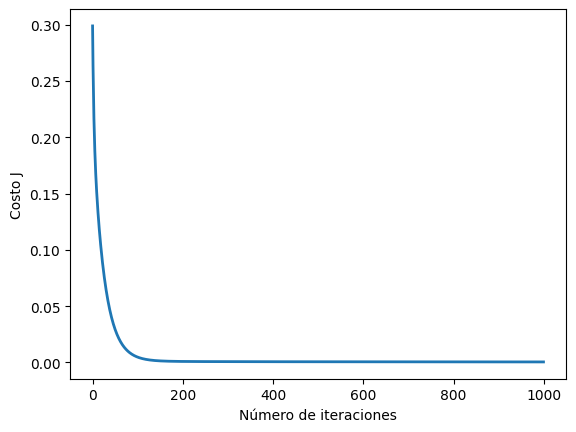

In [61]:
# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.02  # También se puede probar con otros valores como 0.1, 0.001
num_iters = 1000  # <-- 1seg
_lambda = 0.01

# Inicializa theta con la longitud correcta
theta = np.zeros(X_train_ready.shape[1])  # La longitud de theta debe ser igual al número de características más uno

# Ejecuta el descenso de gradiente
theta, J_history = gradientDescentMulti(X_train_ready, y_train, theta, alpha, num_iters, _lambda)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_history[-1]} ")

# Muestra los resultados del descenso de gradiente
print('Theta calculado por el descenso de gradiente: {:s}'.format(str(theta)))

In [62]:
#print(X_test)
# Normalizar los datos
#X_test_norm = (X_test - mu) / sigma

# Agregar una columna de unos para el término de intercepción
m_test = len(X_test)
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)
X_test_ready

array([[ 1.   ,  3.144,  9.   , ...,  1.021, 11.961,  0.993],
       [ 1.   ,  9.3  , 27.   , ...,  1.051, 88.928,  0.994],
       [ 1.   ,  7.148, 21.   , ...,  1.036, 43.923,  0.989],
       ...,
       [ 1.   ,  7.148, 21.   , ...,  1.035, 44.125,  0.974],
       [ 1.   ,  7.148, 21.   , ...,  1.035, 45.6  ,  0.951],
       [ 1.   ,  3.144,  9.   , ...,  1.02 , 12.645,  0.976]])

In [63]:
from sklearn.metrics import r2_score

# Mostrar algunos datos de prueba con sus valores reales y predicciones
print("Muestra de datos de prueba con valores reales y predicciones:")

# Listas para almacenar los valores reales y las predicciones
valores_reales = []
predicciones = []

# Iterar sobre las muestras seleccionadas
for indice in indices_muestra:
    # Obtener las características de prueba y la etiqueta real correspondiente
    x_muestra = X_test.iloc[indice]
    y_muestra = y_test.iloc[indice]

    # Preparar las características de la muestra para la predicción
    x_muestra_norm = (x_muestra - mu) / sigma
    x_muestra_ready = np.concatenate([[1], x_muestra_norm])

    # Realizar la predicción para la muestra
    prediccion_muestra = np.dot(x_muestra_ready, theta)

    # Almacenar los valores reales y las predicciones
    valores_reales.append(y_muestra)
    predicciones.append(prediccion_muestra)

    # Imprimir los valores reales y las predicciones
    print(f"Características: {x_muestra.values}, Valor real: {y_muestra}, Predicción: {prediccion_muestra}")

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(valores_reales, predicciones)

# Imprimir el coeficiente de determinación
print(f"\nCoeficiente de determinación (R^2): {r2}")


Muestra de datos de prueba con valores reales y predicciones:
Características: [5.14000e+00 1.50000e+01 2.75600e+03 2.46200e+03 1.75326e+02 1.75326e+02
 6.97100e+03 2.07700e+00 1.09590e+01 1.02600e+00 2.47320e+01 9.65000e-01], Valor real: 0.49, Predicción: 0.49817990796062794
Características: [4.16100e+00 1.20000e+01 7.73000e+02 2.39900e+03 1.13763e+02 1.13763e+02
 6.07200e+03 1.66100e+00 8.96600e+00 1.02200e+00 1.73680e+01 9.74000e-01], Valor real: 0.344, Predicción: 0.32244548628632047
Características: [1.1380e+00 3.0000e+00 1.6090e+03 2.2040e+03 1.0549e+01 1.0549e+01
 1.8000e+03 1.1990e+00 6.3770e+00 1.0190e+00 2.1200e-01 9.9900e-01], Valor real: 0.133, Predicción: 0.11042801328999736
Características: [4.16100e+00 1.20000e+01 1.08100e+03 2.40400e+03 1.13771e+02 1.13771e+02
 6.47300e+03 1.65900e+00 9.00500e+00 1.02200e+00 1.79360e+01 9.57000e-01], Valor real: 0.355, Predicción: 0.3342980044884074
Características: [9.30000e+00 2.70000e+01 9.77400e+03 3.77000e+03 6.45111e+02 6.45111e+0

Un valor de R2
  de aproximadamente 0.998 indica que el modelo de regresión explica aproximadamente el 99.8% de la variabilidad de los datos de la variable dependiente. En otras palabras, el 99.8%

In [66]:
# Realizar la predicción utilizando el modelo entrenado y X_test_ready
prediccion_test = np.dot(X_test_ready, theta)

print("Y_test:")
print(y_test)

Y_test:
10172    0.237
10322    1.760
9195     0.870
357      0.887
4352     0.677
         ...  
7388     1.755
7176     0.333
5721     0.874
267      0.903
6086     0.250
Name: FuelFlow, Length: 2387, dtype: float64
